In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [10]:
df.shape

(3554, 18)

In [11]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [12]:
latlong = pd.read_csv('gurgaon_sectors_coordinates.csv')

In [13]:
latlong

,Sector,Latitude,Longitude
0,Sector 1,28.518781,77.041862
1,Sector 2,28.509050,77.034283
2,Sector 3,28.497391,77.020526
3,Sector 4,28.475006,77.010353
4,Sector 5,28.480392,77.019095
...,...,...,...
110,Sector 111,28.522277,77.033620
111,Sector 112,28.520340,77.018861
112,Sector 113,28.528665,77.025028
113,Sector 114,28.531878,77.011779


In [14]:
latlong.head()

,Sector,Latitude,Longitude
0,Sector 1,28.518781,77.041862
1,Sector 2,28.509050,77.034283
2,Sector 3,28.497391,77.020526
3,Sector 4,28.475006,77.010353
4,Sector 5,28.480392,77.019095


In [15]:
latlong.rename(columns={"Sector":"sector","Latitude":"latitude","Longitude":"longitude"},inplace="True")

In [16]:
# latlong['sector'] = latlong['sector'].str.strip().str.lower()

In [17]:
new_df = df.merge(latlong, on='sector')

In [18]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score', 'latitude',
       'longitude'],
      dtype='object')

In [19]:
new_df.head(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,latitude,longitude


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    0 non-null      object 
 1   society          0 non-null      object 
 2   sector           0 non-null      object 
 3   price            0 non-null      float64
 4   price_per_sqft   0 non-null      float64
 5   bedRoom          0 non-null      float64
 6   bathroom         0 non-null      float64
 7   balcony          0 non-null      object 
 8   floorNum         0 non-null      float64
 9   agePossession    0 non-null      object 
 10  built_up_area    0 non-null      float64
 11  study room       0 non-null      float64
 12  servant room     0 non-null      float64
 13  store room       0 non-null      float64
 14  pooja room       0 non-null      float64
 15  others           0 non-null      float64
 16  furnishing_type  0 non-null      float64
 17  luxury_score     0 non-null 

In [21]:

group_df = new_df.groupby('sector', as_index=False).mean(numeric_only=True)[
    ['sector','price','price_per_sqft','built_up_area','latitude','longitude']
]



In [22]:
group_df

,sector,price,price_per_sqft,built_up_area,latitude,longitude


In [23]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [24]:
new_df.to_csv('data_viz1.csv',index=False)

In [25]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [26]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [27]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\MI Computer\AppData\Local\Temp\ipykernel_8508\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\MI Computer\AppData\Local\Temp\ipykernel_8508\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

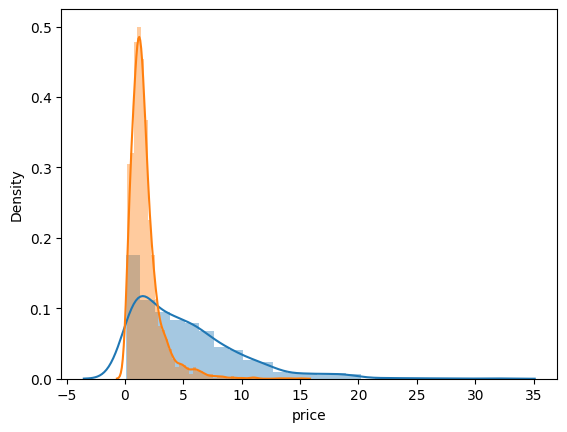

In [ ]:
sns.displot(df[df['property_type'] == 'house']['price'])
sns.displot(df[df['property_type'] == 'flat']['price'])

In [41]:
a_df=pd.read_csv("gurgaon_properties_cleaned_v2.csv")

In [42]:
a_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion the heartsong,sector 108,1.60,7988.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3+,...,2003.0,1500.29,1140.98,0,1,0,0,0,1,60
1,flat,emaar gurgaon greens,sector 102,1.55,9393.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,4,3,...,1650.0,NaN,1022.58,0,1,0,0,0,1,152
2,flat,sobha city,sector 108,3.75,14938.0,2510.0,Super Built up area 2343(217.67 sq.m.),3,3,2,...,2343.0,NaN,NaN,0,1,0,0,0,0,77
3,flat,tulip violet,sector 69,1.28,8111.0,1578.0,Super Built up area 1578(146.6 sq.m.),3,3,2,...,1578.0,NaN,NaN,0,0,0,1,0,1,49
4,flat,spaze privy at,sector 84,1.35,9642.0,1400.0,Super Built up area 1918(178.19 sq.m.)Built Up...,3,3,3,...,1918.0,1750.00,1400.00,0,0,0,1,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,house,independent,sector 28,9.00,27778.0,3240.0,Plot area 360(301.01 sq.m.),6,7,3+,...,NaN,3240.00,NaN,1,1,1,1,0,0,67
3799,house,independent,sector 7,1.16,11693.0,992.0,Plot area 992(92.16 sq.m.)Carpet area: 992 sq....,5,4,2,...,NaN,NaN,992.00,0,0,0,0,1,0,39
3800,flat,central park resorts,sector 48,11.25,28266.0,3980.0,Carpet area: 3980 (369.75 sq.m.),4,5,3+,...,NaN,NaN,3980.00,0,1,0,1,0,0,45
3801,flat,vatika india next,sector 82,0.80,6426.0,1245.0,Carpet area: 1245 (115.66 sq.m.),2,2,3,...,NaN,NaN,1245.00,0,0,0,0,0,0,0


In [43]:
df_grouped = a_df.groupby(["property_type", "furnishing_type"]).size().reset_index(name="count")



In [48]:
fig = px.bar(
    df_grouped,
    x="property_type",
    y="count",
    color="furnishing_type",
    title="Furnishing Distribution by Property Type",
    text="count"
)

fig.update_layout(
    barmode="stack",
    xaxis_title="Property Type",
    yaxis_title="Number of Listings",
    legend_title="Furnishing Level"
)

# st.plotly_chart(fig, use_container_width=True)